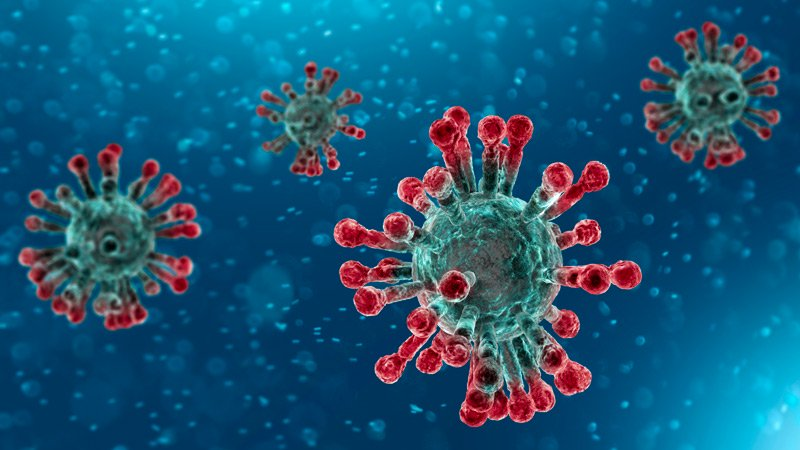

**This beautiful looking virus is destroying humen.**

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

# Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

**Plz *Upvote*, If you like the content**

# Data Loading

In [ ]:
data = pd.read_csv("/kaggle/input/novel-corona-virus-2019-dataset/2019_nCoV_data.csv")
print("Data size : "+str(data.shape))
display(data.head())
world_coordinates = pd.read_csv("../input/world-coordinates/world_coordinates.csv")

# Basic Preprocessing

In [ ]:
print("Columns : ")
print(data.columns.values)

In [ ]:
### Sno and either one of the date field doesnt required for the analysis. so removing those.
data.drop(['Sno','Last Update'], axis = 1, inplace = True)
# Rename the province/State to State
data = data.rename(columns = {"Province/State":"State"})
# Convert Date into Date datatype
data.Date = pd.to_datetime(data.Date)

In [ ]:
# Data is Updated each day and the counts of Confirmed, Deaths, Recovered added day by day with existing count. 
final_data = data[data['Date'] == max(data.Date)]
final_data.shape

# Country-wise Distribution

In [ ]:
country_sum = final_data.groupby(['Country','State'])['Confirmed','Deaths','Recovered'].sum().reset_index()
country_sum

### China is the most affected country

In [ ]:
ex_china = country_sum[country_sum['Country']!='Mainland China']
ex_china

# Cases Distribution except China

In [ ]:
fig = go.Figure(data = [go.Pie(labels = ex_china.Country,values = ex_china.Confirmed)])
fig.show()

### Confirmed cases in other countries except China

In [ ]:
fig = go.Figure(data = [go.Pie(labels = ex_china.Country,values = ex_china.Deaths)])
fig.show()

### Death cases country wise

In [ ]:
fig = go.Figure(data = [go.Pie(labels = ex_china.Country,values = ex_china.Recovered)])
fig.show()

### Recovered cases country wise

In [ ]:
china = final_data[final_data['Country']=='Mainland China']
china

# State wise Distribution in China

In [ ]:
fig = go.Figure(data = [go.Pie(labels = china.State,values = china.Confirmed)])
fig.show()

### Hubei is the highest affected state in China

In [ ]:
fig = go.Figure(data = [go.Pie(labels = china.State,values = china.Deaths)])
fig.show()

In [ ]:
fig = go.Figure(data = [go.Pie(labels = china.State,values = china.Recovered)])
fig.show()

# Geo-Map Visualization

In [ ]:
fig = px.choropleth(country_sum, locations="Country", 
                    locationmode='country names', color="Confirmed", 
                    hover_name="Country", range_color=[1,100], 
                    color_continuous_scale="bluyl", 
                    labels={'Confirmed':'Confirmed Cases'},
                    title='Confirmed Cases by Countries')
fig.update(layout_coloraxis_showscale=False)
fig.show()

In [ ]:
fig = px.choropleth(country_sum, locations="Country", 
                    locationmode='country names', color="Deaths", 
                    hover_name="Country", range_color=[1,100], 
                    color_continuous_scale="purd", 
                    labels={'Deaths':'Deaths Cases'},
                    title='Death Cases by Countries')
fig.update(layout_coloraxis_showscale=False)
fig.show()

In [ ]:
fig = px.choropleth(country_sum, locations="Country", 
                    locationmode='country names', color="Recovered", 
                    hover_name="Country", range_color=[1,100], 
                    color_continuous_scale="greens", 
                    labels={'Recoved':'Recovered Cases'},
                    title='Recovered Cases by Countries')
fig.update(layout_coloraxis_showscale=False)
fig.show()

# Time Series Visualizations

In [ ]:
time_data = data.groupby(['Date'])['Confirmed','Deaths','Recovered'].sum().reset_index()
time_data

## Trend of Confirmed cases

In [ ]:
fig = px.line(time_data, x="Date", y="Confirmed")
fig.show()

## Trend of Death cases

In [ ]:
fig = px.line(time_data, x="Date", y="Deaths")
fig.update_traces(line_color='#FF3322')
fig.show()

## Trend of Recovred Cases

In [ ]:
fig = px.line(time_data, x="Date", y="Recovered")
fig.update_traces(line_color='#33FF22')
fig.show()

### First two weeks Government struggled to solve the issue. Then Recovered cases count increased drastically.

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=time_data['Date'], y=time_data['Confirmed'],mode='lines+markers',name='Confirmed'))
fig.add_trace(go.Scatter(x=time_data['Date'], y=time_data['Deaths'],mode='lines+markers',name='Deaths'))
fig.add_trace(go.Scatter(x=time_data['Date'], y=time_data['Recovered'],mode='lines+markers', name='Recovered'))
fig.update_layout(title='Corona Cases Trend',
                   xaxis_title='Days',
                   yaxis_title='Count')
fig.show()

**Plz *Upvote*, If you like the content**